<a href="https://colab.research.google.com/github/rat-nick/ml-lab/blob/main/Stablo_odlucivanja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stablo odlucivanja

Stablo odlucivanja predstavlja ne parametarski model nadgledanog masinskog ucenja koji moze da resi i klasifikacione i regresione probleme.

Poseduje hijerarhijsku strukturu koja se sastoji iz:

- Korenskog cvora
- Cvorova odluke
- Terminalnih cvorova

Osnovna prednost ovih modela jeste to sto su jednostavni za razumevanje i kada su istrenirani veoma se lako interpretiraju izlazi iz modela.

Ovaj algoritam podseca na ugnjezdeno visestruko grananje u programiranju.
Ono sto predstavlja predmet ucenja ovog modela je da nadje koja su optimalna pitanja koja treba da postavi i kojim redosledom.

## Osnovni pojmovi

### Koren

Pocetni cvor gde cela populacija skupa podataka pocinje da se racva na osnovu raznih odlika i uslova.

### Cvorovi odluke

Ovi cvorovi su rezultat racvanja koje se desava u korenskim cvorovima i predstavljaju naknadne odluke ili uslove unutar stabla.

### Terminalni cvorovi (listovi)

Cvorovi gde dalje racvanje nije moguce, tako ukazujuci na to da smo dosli do finalnog izlaza.

### Podstablo

Podskup stabla odlucivanja ciji je koren neki od cvorova odluke

### Orezivanje

Proces odstranjivanja specificnih cvorova iz stabla kako bi se sprecilo overfit-ovanje i pojednostavio se model.

### Roditelj i dete

Odnos kojim se definise relacija u kojoj se nalaze dva cvora.


## Primer problema

Prethodnih dana smo vodili evidenciju o tome da li smo izlazili napolje da se setamo ili ne.
Pored toga, vodili smo i evidenciju o raznim faktorima za koje smo mislili da mogu da uticu na nasu odluku i prikazali smo ih u sledecoj tabeli gde je svaki red jedan dan.

| Dan | Vreme    | Temperatura | Vlaznost | Vetar | Setnja?
|-----|----------|-------------|----------|-------|---------
| 1   | Suncano  | Toplo       | Visoka   | Slab  | Ne      
| 2   | Oblacno  | Toplo       | Visoka   | Slab  | Da      
| 3   | Suncano  | Normalno    | Normalna | Jak   | Da      
| 4   | Oblacno  | Normalno    | Visoka   | Jak   | Da      
| 5   | Kisovito | Normalno    | Visoka   | Jak   | Ne      
| 6   | Kisovito | Hladno      | Normalna | Jak   | Ne      
| 7   | Kisovito | Normalno    | Visoka   | Slab  | Da      
| 8   | Suncano  | Toplo       | Visoka   | Jak   | Ne      
| 9   | Oblacno  | Toplo       | Normalna | Slab  | Da      

Naravno, samo iz tabele mozemo izvesti neke zakljucke ukoliko se dovoljno dugo i dobro zagledamo.
Ipak, ovo je kurs masinskog ucenja tako da to necemo raditi.



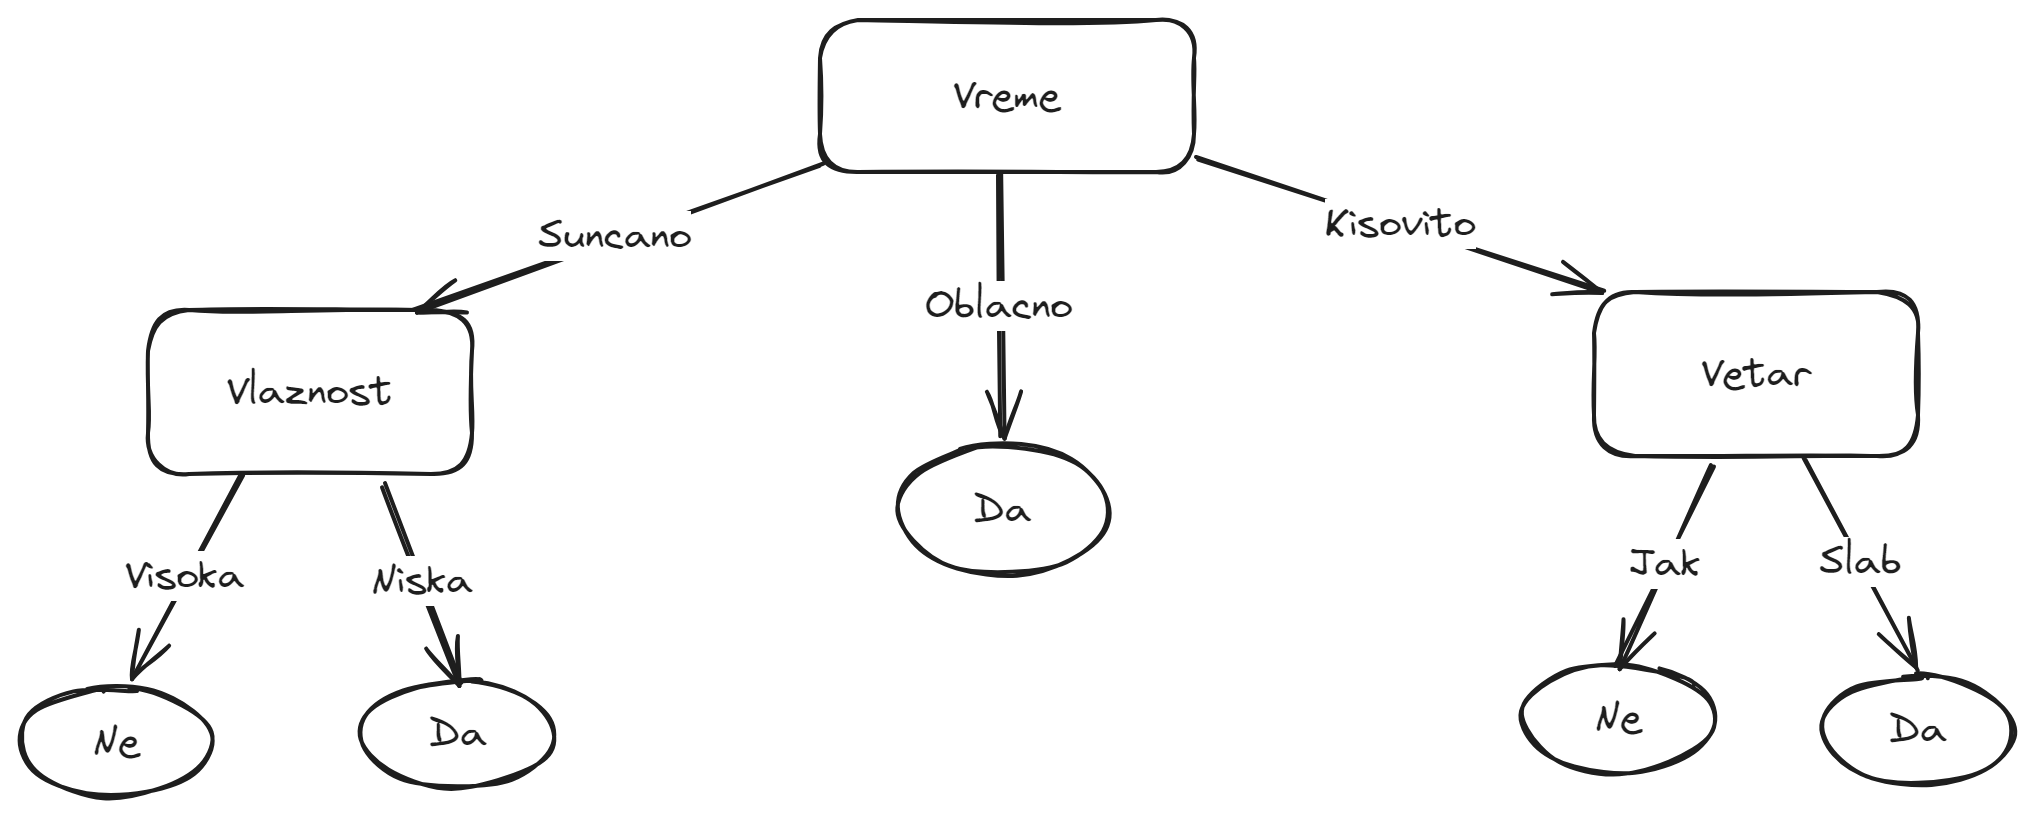

Ako pogledamo stablo iznad, evidentno je da kada je god oblacno, icicemo u setnju.
To se moze zakljuciti i uvidom u tabelu.
Takodje treba primetiti da se temperatura nigde ne uzima u obzir prilikom odlucivanja.
Da li je to greska ili dobra ideja?
Kako bismo sa sigurnoscu mogli da odgovorima na ovakva pitanja, potrebno je da se dublje upoznamo sa pojmovima poput **entropija**, **informacioni dobitak** i **Gini indeks**.


## Algoritam

Stablo odlucivanja funkcionise na sledeci nacin:
### 1 Pocinjemo iz korena
### 2 Postavljamo najbolje pitanje

Trazimo najbitniju odliku ili pitanje koje deli podatke na sto razlicitije grupe.

### 3 Grananje

Na osnovu odgovora na postavljeno pitanje, deli skup podataka u manje podskupove. Svaka grana predstavlja jednu putanju kroz stablo.

### 4 Vratiti se na korak 1

Algoritam nastavlja da nalazi najbolja pitanja i da deli podatke dok ne dodje do terminalnih cvorova koji predstavljaju izlaz.


### Osnovne pretpostavke i karakteristike


#### Cvorovi odluke bi trebali biti binarni

Tipicno se prave binarna racvanja tj. svaki cvor u stablu deli skup podataka na dva podskupa na osnovu jedne odlike ili uslova.

#### Rekurzivno particionisanje

Svaki cvor se racva na svoju decu, i ovaj proces se ponavlja sve dok se ne ispuni uslov za zaustavljanje.

#### Nezavisnost odlika

Pretpostavlja se da su odlike nezavisne. Ovo cesto nije slucaj u praksi, ali stabla odlucivanja i dalje ostvaruju dobre performanse cak i ako su odlike u korelaciji.

#### Homogenost

Svaki cvor ima tendenciju da svojim racvanjem stvara podskupove ciji su clanovi sto slicniji jedni drugima u pogledu ciljane promenjive.

#### Pohlepni pristup odozgo na dole

Stabla odlucivanja se konstruisu koristeci pristup odozgo na dole, i to na pohlepan nacin, tezeci da maksimizuju informacioni dobitak i minimizuju necistocu samo u trenutnom cvoru. Rezultat ovoga je da krajnje stablo ne bude ono najoptimalnije.

#### Kategorijske i numericke promenjive

Mogu da rade sa kategorijskim i numerickim promenjivama, s tim sto zahtevaju razlicite strategije racvanja.

#### Overfitovanje

Ukoliko u podacima postoji znacajan statisticki sum, stabla odlucivanja imaju tendenciju da overfituju. Orezivanje i odabir adekvatnih kriterijuma za zaustavljanje resava ovaj problem.

#### Mere necistoce

Stabla odlucivanja koriste mere necistoce poput Gini necistoce ili entropije kako bi procenili koliko izvesno racvanje dobro deli slucajeve u pogledu ciljane promenjive. Izbor mere necistoce moze uticati na konstrukciju stabla.

#### Nema nedostajucih vrednosti

Ne smeju se naci nedostajuce vrednosti kao takve.

#### Jednak znacaj odlika

Po pravilu se sve odlike gledaju kao jednake osim ako se ne primeni neka vrsta skaliranja ili tezinskih koeficijenata da povecaju ili smanje znacaj odredjenih odlika.

#### Osetljivost na ekstremne vrednosti

Ekstremen vrednosti u skupu podataka mogu znacajno uticati na konstrukciju samog stabla. Preprocesiranje je gotovo uvek neophodno pre izgradnje stabla.

#### Osetljivost na velicinu uzorka

Mali skupovi podataka imaju tendenciju da dovode do overfit-ovanja, dok veliki skupovi mogu da dovedu do veoma kompleksnih stabala.


## Entropija

Iz fizike vam je vec poznato da je entropija mera neuredjenosti nekog termodinamickog sistema.
U kontekstu masinskog ucenja, pozajmljuje se definicija entropije iz **Informacione teorije** koja kaze da entropiju treba shvatiti kao meru neizvesnosti.
Evo konkretnog primera.
Imamo vrecu u kojoj se nalazi podjednak broj crnih i belih kuglica.
Imamo drugu vrecu u kojoj broj kuglica jedne boje preovladava nad brojem kuglica druge boje.
Kazemo za prvu vrecu da ima vecu entropiju od druge vrece.
Boja kuglice koja ce se izvuci nasumicnim izvlacenjem iz prve vrece je neizvesnija od boje kuglice koja ce se izvuci iz druge vrece.

U opstem slucaju, Senonova entropija _(eng. Shannon entropy)_ za neku slucajnu promenjivu $X$ ima vrednost:

$$H(X) = - \sum_{x \in 𝓧} p(x) \log_2 p(x)$$

gde $𝓧$ predstavlja sve moguce vrednosti za slucajnu promenjivu, $p(x)$ verovatnoca da slucajna promenjiva uzme vrednost $x$.



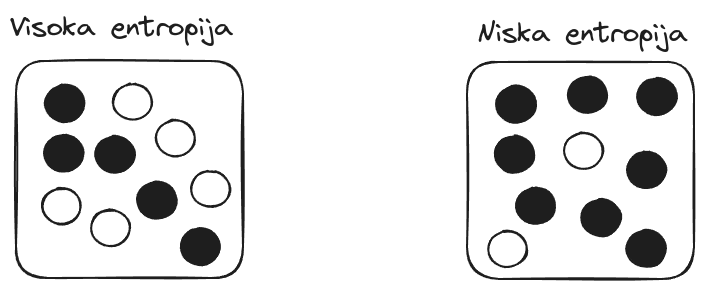

Iz prethodnog primera mozem izracunati entropije ovih skupova.

Prva kutija:
$$
\begin{align}
  H(BojaKuglice) &= - p(Crna) \log_2 p(Crna) - p(Bela)\log_2 p(Bela) =  \\
  &= - \left(\frac{5}{10}\right) log_2 \left(\frac{5}{10}\right) - \left(\frac{5}{10}\right) log_2 \left(\frac{5}{10}\right) = \\
  &= 1
\end{align}
$$

Druga kutija
\begin{align}
  H(BojaKuglice) &= - p(Crna) \log_2 p(Crna) - p(Bela)\log_2 p(Bela) =  \\
  &= - \left(\frac{8}{10}\right) \log_2 \left(\frac{8}{10}\right) - \left(\frac{2}{10}\right) \log_2 \left(\frac{2}{10}\right)= \\
  &≈ 0.722
\end{align}

### Upotreba entropije

Entropija ima ulogu da izmeri kolika je necistoca podataka u pojedinacnim cvorovima stabla odlucivanja. Racvanje je cisto ukoliko deli skup na dva podskupa sa minimalnom entropijom. Jasno je da cilj stabla odlucivanja da svakim racvanjem minimizuje entropiju i da to uradi sto efikasnije.
Kako bismo sto efikasnije izvrsili dati zadatak, uvodimo pojam **Informacioni dobitak** _(eng. Information Gain)_.



## Informacioni dobitak

Informacioni dobitak meri smanjenje nesigurnosti pod pretpostavkom da je odredjena odlika prisutna. Ovo je odlucujuci faktor u pogledu odabira cvorova odluke i korena stabla.

$$Information Gain = E(Y) - E(Y|X)$$

$E(Y)$ predstavlja entropiju celog skupa podataka, a $E(Y|X)$ predstavlja entropiju skupa podataka kada vazi $X$.

Kako bismo bolje razumeli ovaj pojam uzmimo sledeci primer.
Imamo 30 slucajeva u skupu podataka. Skup podatak sluzi da predvidi da li ce izvesna osoba ici u teretanu lil ne. Recimo da je 16 puta otisla i 14 puta nije.

Jasno je vec da je entropija celog skupa podataka veoma blizu 1.
Pretpostavimo da imamo dve odlike:

1. Energija
2. Motivacija

Odlucimo prvo da particionisemo skup podataka na osnovu odlike `Energija` i dobijemo sledece stablo:



![Energy](https://av-eks-blogoptimized.s3.amazonaws.com/9304810.png)

Kada izracunamo entropiju svakog cvora onda dobijemo:

$$
\begin{align}
E(Parent) & = \left(\frac{16}{30}\right) log_2 \left(\frac{16}{30}\right) - \left(\frac{14}{30}\right) log_2 \left(\frac{14}{30}\right) ≈ 0.99 \\
E(Parent|Energy = high) &= \left(\frac{12}{13}\right) log_2 \left(\frac{12}{13}\right) - \left(\frac{1}{13}\right) log_2 \left(\frac{1}{13}\right) ≈ 0.39 \\
E(Parent|Energy = low) &= \left(\frac{4}{17}\right) log_2 \left(\frac{4}{17}\right) - \left(\frac{13}{17}\right) log_2 \left(\frac{13}{17}\right) ≈ 0.79
\end{align}
$$

Naravno, nas interesuje kako ovo racvanje utice na entropiju. Ovo racunamo tako sto izracunamo tezinski prosek entropija svakog od cvorova koji su deca:

$$E(Parent|Energy) = \frac{13}{30} 0.39 + \frac{17}{30} 0.79 = 0.62$$

Stoga je informacioni dobitak za ovu odliku:

$$
E(Parrent) - E(Parrent|Energy) = 0.99 - 0.62 = 0.37
$$


![Motivation](https://av-eks-blogoptimized.s3.amazonaws.com/9933814.png)

Vezba za vas je da izracunate sami informacioni dobitak za odliku `Motivacija`.
Naravno, prvo se zapitajte na osnovu same slike koja odlika bolje smanjuje entropiju tj. maksimizuje informacioni dobitak?

# Implementacija

In [1]:
import numpy as np
from collections import Counter

class Node:
    """
    Klasa koja definise jedan cvor u stablu odlucivanja
    """
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None,):
        """
        Args:
            feature (Any): Odlika po kojoj se vrsi deljenje
            threshold (Any): Vrednost na osnovu koje se vrsi deljenje
            left (Node | None) : Levi potomak
            right (Node | None) : Desni potomak
            value (Any) : Vrednost, vazi samo kod listova
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    """
    Klasa koja predstavlja stablo odlucianja

    Attr:
        min_sample_split (int) : Hiperparametar koji odredjuje minimalan broj slucajeva
        potreban u cvor za nastavak deljenja
        max_depth (int) : Hiperparametar koji odredjuje maksimalnu dubinu stabla
        n_features (int) : broj nasumicnih odlika koji se koristi prilikom odabira kriterijuma
        za deobu
    """
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):

        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        """
        Metoda koja izgradjuje stablo koristeci skup podataka

        Args:
            X (np.ndarray): nezavisne promenjive
            y (np.ndarray): ciljana promenjiva
        """
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        """
        Metoda koja ima zadatak da izgradi cvor sa (skoro) najboljim kriterijumom podele

        Args:
            X (np.ndarray): nezavisne promenjive
            y (np.ndarray): ciljana promenjiva
            depth (int) : trenutna dubina cvora, koren ima dubinu 0

        Returns:
            Node: cvor koji radi (skoro) najbolju podelu
        """
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        # odabir nasumicnih odlika koje ce biti kandidati za najbolji kriterijum
        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        """
        Od svih odbaranih odlika i njihovih jedinstvenih vrednosti
        bira se ona kombinacija koja daje najveci informacioni dobitak

        Args:
            X (np.ndarray): nezavisne promenjive
            y (np.ndarray): ciljana promenjiva
            feat_idxs (list[int]): indeksi odlika koje su izabrane kao kandidati

        Returns:
            Tuple[Any, Any]: uredjeni par odlike i granicne vrednosti
        """
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        """
        Racuna razliku entropija roditelja i dece

        Args:
            X_column: vrednost odlike
            y: vrednosti ciljane promenjive
            threshold: granicna vrednost na kojoj se vrsi split

        Returns:
            float: informacioni dobitak
        """

        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        """
        Deli skup podataka na levi i desni, vracajuci indekse slucajeva koji su
        manji ili jednaki, odnosno veci od granicne vrednosti po datoj koloni, respektivno
        """
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [ ]:
tree = DecisionTree()